# Machine Learning Coursework 

## 1. Exploratory Data Analysis

In [2]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load data
wine=datasets.load_wine()
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target
# X.shape
# y.shape

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

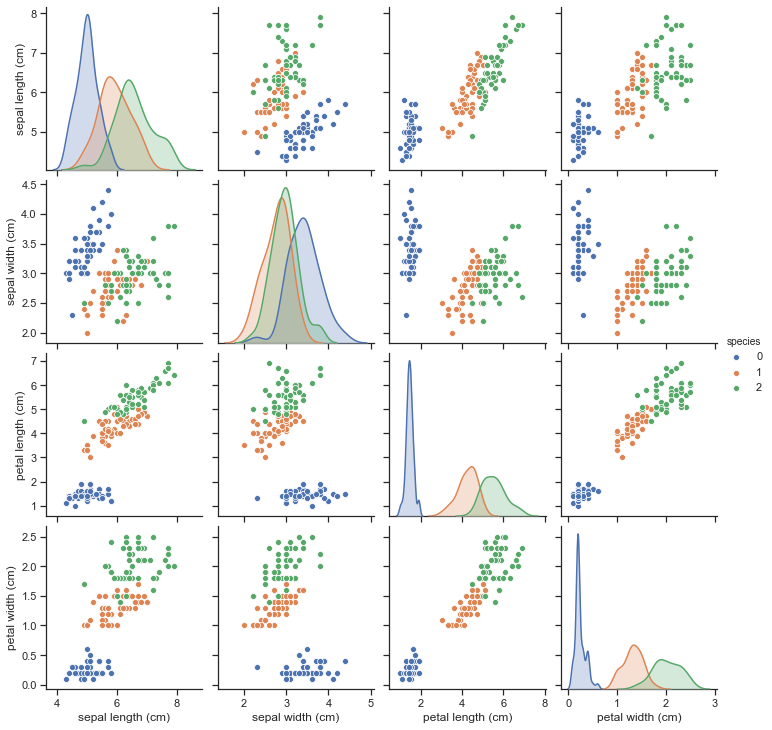

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


### Visualizing Code

In [3]:
#def myplotGrid function:
def myplotGrid(X, y):
    '''
    This function plots histogram in the diagonal 
    and scatter plot for a pairing of each two variables
    
    inputs:
        X - a data matrix of size (samples, features), wine data
        y - a label array of size (samples,), wine target
        
    '''
    fig = plt.figure(figsize=(10,10)) # create an empty figure
    feature_no = X.shape[1] # number of columns (features) to specify the dimension
    k = 0 # initialize a counter for plotting
    for iRrows in range(feature_no): # number of rows do not exceed the features number
        for iColumns in range(feature_no): # number of columns do not exceed the features number
            k += 1 # add to the counter untill rows or columns reach the exact feature number
            ax = fig.add_subplot(feature_no,feature_no,k) #adding subplot which is 4*4 here
            if iRrows == iColumns: #drawing a histogram in the diagonal
                ax.hist(X[:, iRrows]) # plottoing histogram in the diagonal for all rows or all column
                
                ax.set_xlabel(selected_features[iRrows]) # set the label for x axis
                ax.set_ylabel(selected_features[iRrows]) # set the label for y axis
                ax.label_outer() # to avoid labeling each subplot
            else:
                ax.scatter(X[:, iRrows], X[:, iColumns], c=y, cmap=plt.cm.Paired) # plottoing scatter for each 2 unequal pair of variables 

                ax.set_xlabel(selected_features[iColumns]) # set the label for x axis
                ax.set_ylabel(selected_features[iRrows]) # set the label for y axis
                ax.label_outer() # to avoid labeling each subplot

Text(0.5, 0.98, 'Visualisation')

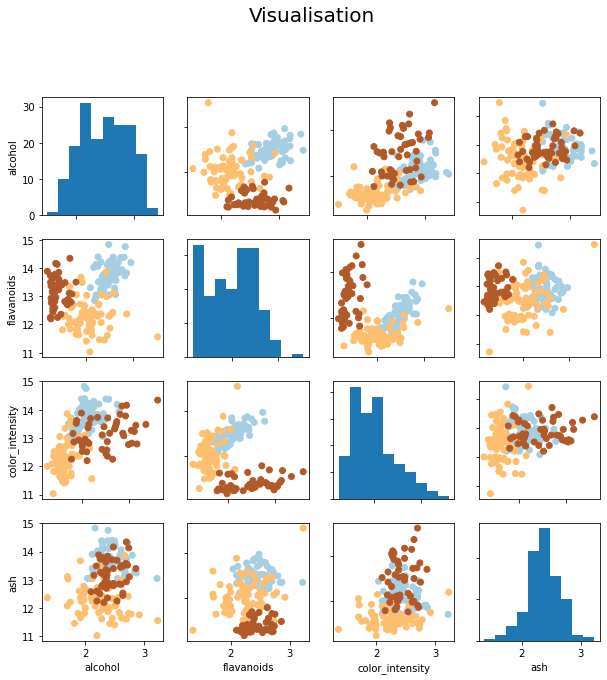

In [4]:
# run the plotting function
myplotGrid(X, y)
plt.suptitle('Visualisation', verticalalignment='bottom', fontsize = 20) # add title to overall plots

### Evaluation Code for Plotting

In [8]:
df_wine_selected

,alcohol,flavanoids,color_intensity,ash,class
0,14.23,3.06,5.64,2.43,0
1,13.20,2.76,4.38,2.14,0
2,13.16,3.24,5.68,2.67,0
3,14.37,3.49,7.80,2.50,0
4,13.24,2.69,4.32,2.87,0
...,...,...,...,...,...
173,13.71,0.61,7.70,2.45,2
174,13.40,0.75,7.30,2.48,2
175,13.27,0.69,10.20,2.26,2
176,13.17,0.68,9.30,2.37,2


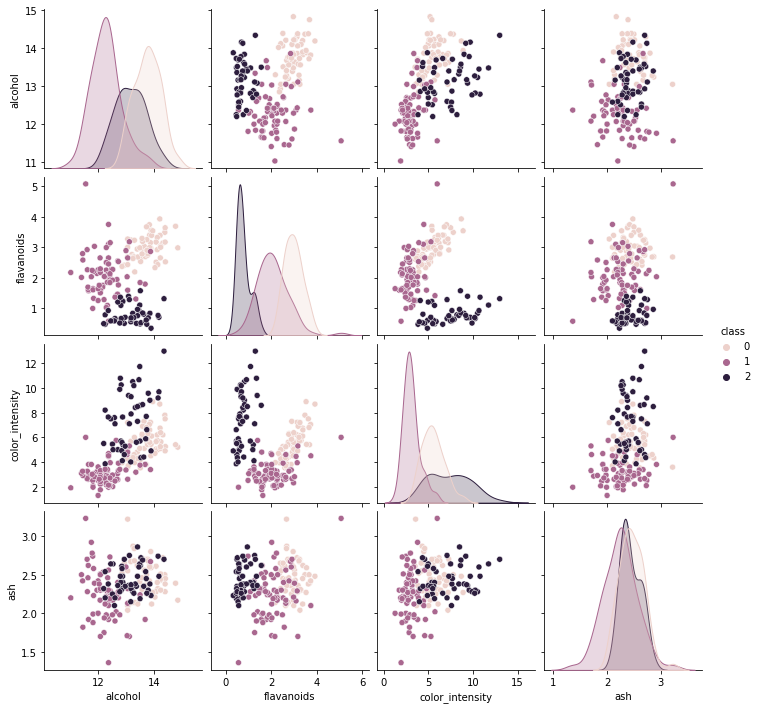

In [5]:
#evaluate using ready seaborn library
df_wine_selected = pd.DataFrame(X, columns = selected_features) # set a new data frame with the selected features
df_wine_selected['class'] = y # append y values as a new column in the df_wine_selected data frame
sns.pairplot(df_wine_selected, hue = 'class') #plotting with seaborn

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

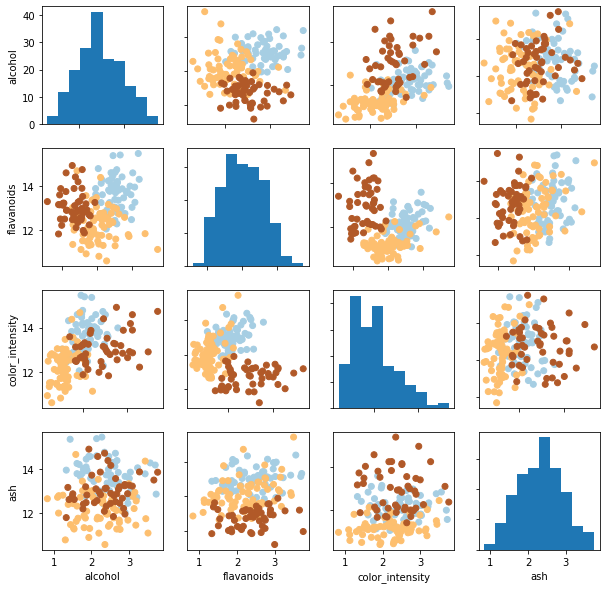

In [18]:
# noise code 
mySeed = 123456 
np.random.seed(mySeed) 
XN = X + np.random.normal(0,0.5,X.shape)
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
I would choose flavanoids and color_intensity since they produce a cleaner visualisation among other features, as well as we could easily see the classification for each of our variable. For example, if we have been given any point we could easily say in which class does it belong to


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:
It was easier to spot clusters in the data as well correlation between various feauters. However, after adding noise, it became very challening to identify clear classification, hence, any prediction for new instances will most likely have low accuracy. 


## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and ***matplotlib functions.***

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


### Splitting the Data and Traget into Train and Test

In [19]:
# helper code
from sklearn.model_selection import train_test_split

# split to train and test using a ready sklearn library
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# splitting wine data and target to train and test 
np.random.seed(mySeed) # using the same seed to avoid data changing with every run
indices = np.random.permutation(len(X))
testset_length = int(len(X)*0.2) # setting test data to have sample of 20% from the entire data
Xtrain = X[indices[:-testset_length]] # slice X train from beginning till the indice before the test set length
ytrain = y[indices[:-testset_length]] # slice y train from beginning till the indice before the test set length
Xtest  = X[indices[-testset_length:]] # slice X test from test set length to the end
ytest  = y[indices[-testset_length:]] ## slice y test from test set length to the end

### K-NN Code

In [20]:
# mykNN code:
import math
import operator
options = [list(range(1, 11)), ['euclidean', 'manhattan']]

# calculating euclidean distance for 2 vectors
def euclidean_distance(r1, r2):# get distance between 2 rows
    '''
    This function calculates euclidean distance for each two vectors
    
    inputs:
        r1, r2 - array of size (samples, dimensions)
        
    output:
        distance - return distance of shape (samples, samples) 
        
    '''
    dist = 0 # accumulator for distance
    length = range(len(r1))
    for i in length: # for every row in r1
        dist += (r1[i] - r2[i])**2 # calculate euclidean for values in the same index in the 2 rows
        distance = math.sqrt(dist)
    return distance

# euclidean distance could be done also using zip function
# def euclidean_distance(r1, r2): 
#     points = zip(r1, r2)
#     distance = [pow(a - b, 2) for (a, b) in points]
#     distance = math.sqrt(sum(distance))
#     return distance


# calculating manhattan distance for 2 vectors
# row 1 and row 2 will be denoted as r1 and r2

def manhattan_distance(r1, r2): # another distance measure between 2 rows
    '''
    This function calculatse manhattan distance for each two vectors
    
    inputs:
        r1,r2 - array of size (samples, dimensions)
        
    output:
        dist - return distance of shape (samples, samples) 
        
    '''
    dist = 0 # accumulator for distance
    length = range(len(r1))
    for i in length: # for each row in r1 
        dist += abs(r1[i] - r2[i]) # calculate manhattan for values in the same index
    return dist

# manhattan distance could be done also using zip function
# def manhattan_distance(r1, r2): 
#     points = zip(r1, r2)
#     distance = [abs(a - b, 2) for (a, b) in points]
#     distance = sum(distance)
#     return distance

# calculating distances for the new instance and the originl data, return neighbours

def myNeighbours(X_, X, n_neighbour, metric):
    '''
    This function gets the nearest neighbours
    
    inputs:
        X_ - a data matrix of size (samples, features), X test
        X - a data matrix of size (samples, features), X train
        n_neighbour - int value which contains number of neighbour 
        metric - a list which contains the distance metrics
        
    output:
        neighbours - array of n_neighbour nearest points
        
    '''
    distance = [] # generate an empty list to put the distance
    length = range(len(X))
    if metric == "euclidean": # if the metric is euclidean 
        for i in length: # for each row in X
            metric_distance = euclidean_distance(X_, X[i]) # compute the euclidean distance
            distance.append(metric_distance) # store it in the distance list
  
    else:  # otherwise the metric is manhattan 
        for i in length: # for each row in X
            metric_distance = manhattan_distance(X_, X[i]) # compute the manhattan distance
            distance.append(metric_distance) # store it in the distance list
           
    distance = np.argsort(distance) # store the distance as a numpy array
    neighbours = distance[:n_neighbour] # take all the rows until the n neighbour
    
    return neighbours


def set_label(neighbour, y):
    '''
    This function assigns label for neighbours
    
    inputs:
        neighbour - array, which contains number of neighbours
        y - a label array of size (samples,) y train
        
    output:
        label - dict of label 
        
    '''
    counter = {} # initilise an empty dictionary, I use it to be able to assign neighbours with their label as key-value pair
    for i in neighbour: # for every value in the neighbour
        if y[i] in counter: 
            counter[y[i]] += 1 # Accumulator for class
        else:
            counter[y[i]] = 1 # otherwise set it to 1
    label = max(counter.items(), key=operator.itemgetter(1))[0] # get the class with the highest frequency
    return label


def mykNN(X, y, X_, options):
    '''
    This function get the predicted y value
    
    inputs:
        X_ - a data matrix of size (samples, features), X test
        X - a data matrix of size (samples, features), X train
        y - a label array of size (samples,) y train
        options - a list which contains two lists
        
    output:
        new_predict - a label array of size (samples,) 
        
    '''
    new_predict = [] # create a list of new  predicted value
    length = range(len(X_)) 
    for i in length: # check each row in the Xtest data
        neighbour = myNeighbours(X_[i], X, options[0], options[1]) # get a neighbour
        new_predict.append(set_label(neighbour, y)) # add the assigned label to the new predict list
    return new_predict

In [21]:
no_neighbours = list(range(1, 11))
metric = ['euclidean', 'manhattan']
# for m in range(len(metric)):
for n in range(len(no_neighbours)):
    knn = mykNN(Xtrain, ytrain, Xtest, [no_neighbours[n], metric[0]]) # used euclidean metric to be able to compare it with the sklearn one

print(np.array(knn))
np.array(knn) == y_ # just for evaluation, the cell below (y_) must be run first

[1 1 0 1 2 1 2 1 2 2 0 0 2 1 1 1 0 2 0 1 1 0 0 1 0 0 1 2 0 1 0 2 0 0 0]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

### K-NN Code validation Using Sklearn 

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean') # define knn classifier, with 10 neighbors and use the euclidian distance
knn.fit(Xtrain, ytrain) # fitting the classifier by defining training and testing data
y_ = knn.predict(Xtest) #predict test values based on training data

# print(ytest) # true values
print(y_) # predicted values

[1 1 0 1 2 1 2 1 2 2 0 0 2 1 1 1 0 2 0 1 1 0 0 1 0 0 1 2 0 1 0 2 0 0 0]


## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


### Classifier Evaluation Code

In [23]:
# code for confusion matrix, accuracy, precision, recall, f1score. 
def conf_mat(y_test,y_predict,label_no): # get the confusion metrix with 3 dimensions based on unique number of classes
    '''
    This function computes the confusion metrix given the true/predicted labels based on unique number of classes 
    
    inputs:
        y_test - a label array of size (samples,), grount y
        y_predict - a label array of size (samples,), predicted y
        label_no - int value which represents the label's dimensions

    output:
        C - returns confusion matrix, size (n_classes, n_classes)
        
    '''
    C = np.zeros((label_no,label_no),dtype=int) # creat an empty matrix with the class number dimensions 
    length = range(0,len(ytest)) # range of the y tested
    for i in length: # for each row in the y test
        if y_test[i] == y_predict[i]: # for the diagonal when the y ground equal the y predict
            C[y_test[i],y_predict[i]]+=1
        else: # when the y ground does not equal the y predict
             C[y_test[i],y_predict[i]]+=1 # fill the confusion matrix for every c[i,j]
    return C 


def accuracy(y_test,y_predict):
    '''
    This function calculates the total accuracy between y ground and y predict    
    inputs:
        y_test - a label array of size (samples,), grount y
        y_predict - a label array of size (samples,), predicted y

    output:
        Total_accuracy - float, returns accuracy given the true/predicted labels
        
    '''
    correct = np.where(y_test==y_predict, 1, 0 ) # the diagonal where y ground and y predict are equals
    total = len(y_test) # total number of ground y
    Total_accuracy = sum(correct)/total
    return Total_accuracy # calculate the total number accuracy


def precision(y_test,y_predict):
    '''
    This function calculate the precision to show how precise the model (predicted positive are actual positive)
    
    inputs:
        y_test - a label array of size (samples,), grount y
        y_predict - a label array of size (samples,), predicted y
        
    output:
        precision - an array, which returns precision for each class
        
    '''
    classes = np.unique(y_test) # number of the unique classes
    precision = np.zeros(classes.shape) # create an empty array to store the precision 
    
    C = conf_mat(ytest,y_predict,len(classes)) # compute the confusion matrix 
              
    for i in classes: # for each i in the classes dimension
        precision[i] = C[i,i] / sum(C[:,i]) # calculate precision for for each true positive over it's total rows value
        
    return precision


def recall(y_test,y_predict):
    '''
    This function calculate the recall to show how many actual positives our model labels them as Positive
    
    inputs:
        y_test - a label array of size (samples,), grount y
        y_predict - a label array of size (samples,), predicted y
        
    output:
        new_predict - an array, which returns recall for each class
        
    '''
    classes = np.unique(y_predict) # number of the unique classes
    recall = np.zeros(classes.shape) # create an empty array to store the recall
    
    C = conf_mat(ytest,y_predict,len(classes)) # use the previous confusion matrix function to calculate the recall
              
    for i in classes: # for each i in the classes dimension
        recall[i] = C[i,i] / sum(C[i,:]) # calculate recall for each true positive over it's total column value
    
    return recall


def f1score(y_test,y_predict):
    '''
    This function calculate the f1 score see the balance between Precision and Recall
    
    inputs:
        y_test - a label array of size (samples,), grount y
        y_predict - a label array of size (samples,), predicted y
        
    output:
        new_predict - an array, which returns f1 score for each class
        
    '''
    classes = np.unique(y_predict) # number of the unique classes
    f1score = np.zeros(classes.shape) # create an empty array to store f1score
    
    p = precision(ytest,y_) # compute the precision 
    r = recall(ytest,y_) # compute the recall
    
    for i in classes: # for each i in the classes dimension
        f1score[i] = 2 / (1 / p[i] + 1 / r[i]) # calculate f1score
    
    return f1score

In [24]:
# run the code for confusion matrix, accuracy, precision, recall and f1score
print(conf_mat(ytest,y_, len(np.unique(y))),'\n') 

print('Accuracy: %.2f' % accuracy(ytest,y_),'\n')

print('Precision:', precision(ytest,y_))
print('Precision average: %.2f' %np.mean(precision(ytest,y_)),'\n')

print('Recall:', recall(ytest,y_))
print('Recall average: %.2f' %np.mean(recall(ytest,y_)),'\n')

print('F1score:', f1score(ytest,y_))
print('F1score average: %.2f' %np.mean(f1score(ytest,y_)))

[[12  0  0]
 [ 2 12  0]
 [ 0  1  8]] 

Accuracy: 0.91 

Precision: [0.85714286 0.92307692 1.        ]
Precision average: 0.93 

Recall: [1.         0.85714286 0.88888889]
Recall average: 0.92 

F1score: [0.92307692 0.88888889 0.94117647]
F1score average: 0.92


### Validation Code using Sklearn 

In [25]:
# code validation using sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

print(confusion_matrix(ytest,y_),'\n') # return confusion matrix for y ground and y predict
print('Accuracy: %.2f'% accuracy_score(ytest,y_),'\n') # the total accuracy is returned
print('Precision: ', precision_score(ytest, y_, average = None)) # precision score for each class are returned
print('Precision average: %.2f'% np.mean(precision_score(ytest, y_, average = None)),'\n') # precision average
print('Recall: ', recall_score(ytest, y_, average = None)) # recall score for each class are returned
print('Recall average: %.2f'% np.mean(recall_score(ytest, y_, average = None)),'\n') # recall average
print('F1score: ', f1_score(ytest, y_, average = None)) # f1score for each class are returned
print('F1score average: %.2f'% np.mean(f1_score(ytest, y_, average = None))) # f1score average

[[12  0  0]
 [ 2 12  0]
 [ 0  1  8]] 

Accuracy: 0.91 

Precision:  [0.85714286 0.92307692 1.        ]
Precision average: 0.93 

Recall:  [1.         0.85714286 0.88888889]
Recall average: 0.92 

F1score:  [0.92307692 0.88888889 0.94117647]
F1score average: 0.92


### Comparing between my Implementaion and Sklearn Implementation

In [1]:
# summarizing the results in a data frame to compare with my implementation and sklearn implementation
my_accuracy = '%.2f'% accuracy(ytest,y_)
sklearn_accuracy = '%.2f'% accuracy_score(ytest,y_)

my_precision = '%.2f'% np.mean(precision(ytest,y_))
sklearn_precision = '%.2f'% np.mean(precision_score(ytest, y_, average = None))

my_recall = '%.2f'% np.mean(recall(ytest,y_))
sklearn_recall = '%.2f'% np.mean(recall_score(ytest, y_, average = None))

my_f1score = '%.2f'% np.mean(f1score(ytest,y_))
sklearn_f1score = '%.2f'% np.mean(f1_score(ytest, y_, average = None))

# summarizing the results in a data frame
pd.DataFrame([[my_accuracy, sklearn_accuracy], [my_precision, sklearn_precision], [my_recall, sklearn_recall], [my_f1score, sklearn_f1score]],
             ['Accuracy', 'Precision Average', 'Recall Average', 'F1score Average'],    
             columns=['My Implementation', 'Sklearn\'s Implementation']) 

NameError: name 'accuracy' is not defined


## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [27]:
# parameters for testing code
options = [list(range(1, 11)), ['euclidean', 'manhattan']]
nFolds = 5

### Nested Cross Validation Code

In [63]:
# myNestedCrossVal code
# some variables have been defined as global to be able to use it outside the function
# supposed to have around 100 iteration, 5 for the test fold (iFold) and 20 iteration in the hyperparameters loop (10 distance and 2 metrics)

def myNestedCrossVal(X,y,nFolds,neighbors,distances,mySeed):
    '''
    This function calculate the f1 score see the balance between Precision and Recall
    
    inputs:
        X - a data matrix of size (samples, features), wine data 
        y - a label array of size (samples,), predicted target data
        nFolds - int, number of folds
        neighbors - a list of neighbors
        distances - a list of matric distances
        mySeed - random number generator 
        
    output:
        accuracies_fold - an array, which returns accuracy for each class
        
    '''
    global accuracies_fold
    accuracies_fold = [] # create an empty list to store the acucuracies per fold
    
    np.random.seed(mySeed) # using the same seed defined previously
    indices = np.random.permutation(np.arange(0,len(X),1)) # shuffle indices from 0 to length X with only one step 
    indices = np.array_split(indices, nFolds) # split indices into folds (outer loops)
    
    for iFold in range(0, nFolds): # for each fold in the range of number of all folds
        global trainFold
        trainFold = [] # initilize empty list to store the outer training fold in it
        global testFold
        testFold = [] # initilize empty list to store the testing fold in it
        
        # there are different methods to apply the inner loop, I have used two methods
        # the one below based on the lecture video and hint given in the course work which states that the validation has always index 0
        # start of my first method
        global validationFold
        validationFold = [] # initilize empty list to store the validation fold in it
        testFold = indices[iFold] # set test fold to have iFold (we have 5 iteration here)
        print("Fold Number: ", iFold) # print the index of each fold just for orgnizing  
        remaining_folds = np.delete(range(0,nFolds), iFold) # from nFold, delete index iFold which is assigned to testFold
        # split the remaining into training and validation fold
        validationFold = indices[remaining_folds[0]] # set validation fold to have always index 0
        # set indices 1, 2, 3 to be for the training fold
        remaining_indices = np.append(indices[remaining_folds[1]], indices[remaining_folds[2]])
        trainFold = np.append(remaining_indices, indices[remaining_folds[3]])
        # end of my first method
        
#         # start of the second method
#         # I implemented the below code based on sklearn method, where the validation iterate through the training inner loop
#         testFold = indices[iFold] # set test fold to have iFold (we have 5 iteration here)
#         print("Fold Number: ", iFold) # print the index of each fold just for orgnizing
#         for jFold in range(0, nFolds): # for each fold from 0 to the number of folds
#             if jFold != iFold: # if the fold j is not the same fold for the test fold
#                 trainFold.extend(indices[jFold]) # set fold j to be in training fold list
                
#         # inner loop split the remaining folds to cross validation and training fold
#         train_split = np.array_split(trainFold, nFolds-1) # split the train fold into train fold and validation fold
        
#         for kFold in range(0, nFolds-1): # nFold-1 why? because we have one fold index for the test fold
#             # when applying this could, I recommend to markdown the above initilization for the validationFold to avoid duplication
#             trainFold = [] # initilize empty list to store the inner training fold
#             validationFold = [] # initilize empty list to store the validation fold
#             validationFold = train_split[kFold].tolist() # set validation fold to have fold k
#             for lFold in range(len(train_split)): # for each fold in the training split
#                 if lFold != kFold: # if the fold l is not the same fold for the validation fold
#                     trainFold.extend(train_split[lFold]) # set fold l to be in the inner training fold list
#             # end of the second method loop
                
                      
        # initilaize the best hyperparameters values            
        global best_distance
        best_distance = '' # inintilize and empty string for the best distance
        global best_neighbor
        best_neighbor = -1 # set it to 0 as the neighbors between 1 and 10
        best_accuracy = -1 # set it to minus as there is no minus accuracy
        
        # iterate through my 2 hyperparameters, we supposed to have 20 iteration with the hyperparameters
        for i in range(0, len(distances)):
            for j in range(0, len(neighbors)):
                
                # evaluating the hyperparameters using validation set
                val_pred = mykNN(X[trainFold], y[trainFold], X[validationFold],[neighbors[j], distances[i]]) # make prediction using X validation
                total_accuracy = accuracy(y[validationFold],val_pred) # get the accuracy for the validation using accuracy implementation code
                
                # set the best hyperparameters 
                # in every loop compare accuracy to the previous and set the highest value for (accuracy, dinstance and neighbor)
                if total_accuracy > best_accuracy: 
                    best_distance = distances[i]
                    best_neighbor = neighbors[j]
                    best_accuracy = total_accuracy
         
        # run the below code when using the second implementaion for the inner loop as we will have 2 trainFold
#         trainFold = trainFold + validationFold # assign the validation fold to the train fold after evaluating the validation

        # evaluate the test data on the outer loop using the best hyperparameters
        global y_
        y_ = mykNN(X[trainFold], y[trainFold], X[testFold],[best_neighbor, best_distance]) # make prediction using X test
        total_accuracy = accuracy(y[testFold],y_) # calculate accuracy
        confmat = conf_mat(y[testFold], y_, len(np.unique(y))) # compute the confusion matrix
        
        print(confmat)
        print("best Accuracy: ", total_accuracy)
        print("best Distance: ", best_distance)
        print("best Neighbor: ", best_neighbor, "\n")
        accuracies_fold.append(total_accuracy)
 
    return accuracies_fold

# print(len(trainFold)) 
# print(len(testFold))
# print(len(validationFold))

### Nested Cross Validation Clean Data Code 

In [64]:
# evaluate clean data code
accuracies_fold = myNestedCrossVal(X, y, 5, options[0] ,options[1],mySeed)
print("List of Fold Accuracies: ", accuracies_fold)
print("Accuracies Average is: " '%.2f'% np.mean(accuracies_fold))
print("Accuracies Standard Deviation: " '%.2f'% np.std(accuracies_fold))

Fold Number:  0
[[11  0  0]
 [ 1 16  0]
 [ 0  0  7]]
best Accuracy:  0.9722222222222222
best Distance:  euclidean
best Neighbor:  5 

Fold Number:  1
[[13  0  0]
 [ 0 10  0]
 [ 0  1 11]]
best Accuracy:  0.9722222222222222
best Distance:  euclidean
best Neighbor:  3 

Fold Number:  2
[[10  0  0]
 [ 2 12  1]
 [ 0  0 10]]
best Accuracy:  0.9166666666666666
best Distance:  euclidean
best Neighbor:  1 

Fold Number:  3
[[10  2  0]
 [ 2 11  1]
 [ 0  0  9]]
best Accuracy:  0.8571428571428571
best Distance:  euclidean
best Neighbor:  1 

Fold Number:  4
[[12  0  0]
 [ 1 13  0]
 [ 0  0  9]]
best Accuracy:  0.9714285714285714
best Distance:  manhattan
best Neighbor:  8 

List of Fold Accuracies:  [0.9722222222222222, 0.9722222222222222, 0.9166666666666666, 0.8571428571428571, 0.9714285714285714]
Accuracies Average is: 0.94
Accuracies Standard Deviation: 0.05


### Nested Cross Validation Noisy Data Code 

In [50]:
# evaluate noisy data code
accuracies_fold_noise = myNestedCrossVal(XN, y, 5, options[0] ,options[1],mySeed)
print("List of Fold Accuracies: ", accuracies_fold_noise)
print("Accuracies Average is: " '%.2f'% np.mean(accuracies_fold_noise))
print("Accuracies Standard Deviation: " '%.2f'% np.std(accuracies_fold_noise))

Fold Number:  0
[[10  1  0]
 [ 0 12  2]
 [ 0  0 10]]
best Accuracy:  0.8888888888888888
best Distance:  euclidean
best Neighbor:  3 

Fold Number:  1
[[11  3  0]
 [ 2 12  0]
 [ 0  0  7]]
best Accuracy:  0.8611111111111112
best Distance:  euclidean
best Neighbor:  3 

Fold Number:  2
[[11  1  0]
 [ 3  8  0]
 [ 0  0 12]]
best Accuracy:  0.8888888888888888
best Distance:  euclidean
best Neighbor:  3 

Fold Number:  3
[[ 9  2  0]
 [ 4 11  1]
 [ 1  0  7]]
best Accuracy:  0.7714285714285715
best Distance:  euclidean
best Neighbor:  3 

Fold Number:  4
[[ 8  1  0]
 [ 2 13  0]
 [ 0  2  9]]
best Accuracy:  0.8571428571428571
best Distance:  euclidean
best Neighbor:  5 

List of Fold Accuracies:  [0.8888888888888888, 0.8611111111111112, 0.8888888888888888, 0.7714285714285715, 0.8571428571428571]
Accuracies Average is: 0.85
Accuracies Standard Deviation: 0.04


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9444444444444444  |  3 | euclidean  |
| 2 | 0.9722222222222222  |  5 | euclidean  |
| 3 | 0.8888888888888888  |  3 | euclidean  |
| 4 | 0.8571428571428571  |  1 | euclidean  |
| 5 | 0.9714285714285714  |  3 | manhattan  |
| **total** | 0.93 $\pm$ 0.05  |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.9166666666666666  |  5 | euclidean  |
| 2 | 0.8888888888888888  |  8 | euclidean  |
| 3 | 0.8888888888888888  |  9 | euclidean  |
| 4 | 0.8285714285714286  |  3 | euclidean  |
| 5 | 0.9142857142857143  |  5 | euclidean  |
| **total** | 0.89 $\pm$ 0.03|   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


### Total Confusion Matrix Code

In [31]:
# I use the same code just adding the total confusion matrix inside the loop

def cmt_total(X,y,nFolds,neighbors,distances,mySeed):
    '''
    This function compute the total confusion matrix with classes dimensions
    
    inputs:
        X - a data matrix of size (samples, features), wine data 
        y - a label array of size (samples,), predicted target data
        nFolds - int, number of folds
        neighbors - a list of neighbors
        distances - a list of matric distances
        mySeed - random number generator 
        
    output:
        confusion_total - total confusion matrix, shape 
        
       '''
    np.random.seed(mySeed) # using the same seed defined previously
    indices= np.random.permutation(np.arange(0,len(X),1)) # shuffle indices from 0 to length X with only one step 
    indices=np.array_split(indices, nFolds) # split indices into folds 
    global matrix
    matrix = []
    for iFold in range(0, nFolds): # for each fold in the range of folds number (outer loops)
        global trainFold
        trainFold = [] # create an empty list to store the train fold
        global testFold
        testFold = [] # create an empty list to store the test fold
        validationFold = [] # create an empty list to store the validation fold
        
        testFold = indices[iFold] # set test fold to have 1 fold out of our 5 folds
        remaining_folds = np.delete(range(0,nFolds), iFold) # from nFold, delete index iFold which is assigned to testFold
        validationFold = indices[remaining_folds[0]] # set validation fold to have always index 0
        # set indices 1, 2, 3 to be for the training fold
        remaining_indices = np.append(indices[remaining_folds[1]], indices[remaining_folds[2]])
        trainFold = np.append(remaining_indices, indices[remaining_folds[3]])

                      
        # initilaize the hyperparameters values            
        global best_distance
        best_distance = '' # inintilize and empty string for the best distance
        global best_neighbor
        best_neighbor =  0 # set it to 0 as the neighbors between 1 and 10
        best_accuracy = -1 # set it to minus as there is no minus accuracy
        
        # iterate through my 2 hyperparameters
        for i in range(0, len(distances)):
            for j in range(0, len(neighbors)):
                
                # evaluating the hyperparameters using validation set
                val_pred = mykNN(X[trainFold], y[trainFold], X[validationFold],[neighbors[j], distances[i]]) # make prediction using X validation
                total_accuracy = accuracy(y[validationFold],val_pred) # get the accuracy for the validation using accuracy implementation code
                
                # set the best hyperparameter
                # in every loop compare accuracy to the previous and set the highest value for (accuracy, dinstance and neighbor)
                if total_accuracy > best_accuracy:
                    best_distance = distances[i]
                    best_neighbor = neighbors[j]
                    best_accuracy = total_accuracy
                           
        # evaluate the test data on the outer loop using the best hyperparameters
        global y_
        y_ = mykNN(X[trainFold], y[trainFold], X[testFold],[best_neighbor, best_distance]) # make prediction using X test  
        total_accuracy = accuracy(y[testFold],y_) # calculate accuracy
        confmat = conf_mat(y[testFold], y_, len(np.unique(y))) # compute the confusion matrix
        matrix.append(confmat) # assign the confusion matrix to the matrix which was initilized on the top
        
    global confusion_total
    confusion_total = np.zeros((len(matrix[0]), len(matrix[0])), dtype=int) # Initilize an empty matrix with length of confusion matrix dimensions
    
    for i in range(0, len(matrix)): # for every value in the length of the matrix
        confusion_total += matrix[i] # counter to sum up all the matrix to the total confusion matrix
    
    return confusion_total

## Total Confusion Matrix and Plot for Clean Data 

In [32]:
# print('CLEAN')
# clean data summary results
total_confusion = cmt_total(X,y,5,options[0],options[1],mySeed)
print("Total Confusion Matrix:","\n", total_confusion, "\n")

Total Confusion Matrix: 
 [[55  3  0]
 [ 6 62  2]
 [ 0  2 45]] 



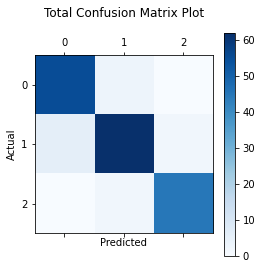

In [33]:
# create function for plotting the total confusion matrix
total_confusion = cmt_total(X,y,5,options[0],options[1],mySeed)
df_cm = pd.DataFrame(total_confusion) #change the the confusion matrix to data frame
def plot_confusion_matrix(df_cm, cmap=plt.cm.Blues): # create function for plotting the total confusion matrix
    plt.matshow(df_cm, cmap=cmap) #  # add color bar on the side
    plt.colorbar()
    plt.ylabel('Actual') # label y axis
    plt.xlabel('Predicted') # label x axis
    plt.grid(False) # stop showing the grid
    plt.title("Total Confusion Matrix Plot" '\n') # plot title
plot_confusion_matrix(df_cm)

<AxesSubplot:title={'center':'Seaborn Total Confusion Matrix Plot'}, xlabel='Predicted', ylabel='Actual'>

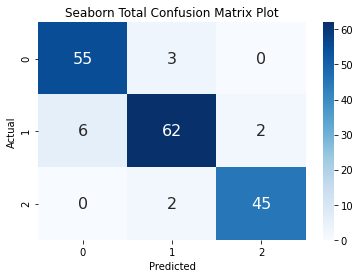

In [34]:
# plotting using seaborn 
total_confusion = cmt_total(X,y,5,options[0],options[1],mySeed)
df_cm = pd.DataFrame(total_confusion) # change the the confusion matrix to data frame
ax = plt.axes() # initilize it to set the title
ax.set_title('Seaborn Total Confusion Matrix Plot') # add title
df_cm.index.name = 'Actual' # label y axis
df_cm.columns.name = 'Predicted' # label x axis
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, ax = ax) # plot the confusion matrix

## Total Confusion Matrix and Plot for Noisy Data 

In [35]:
# print('NOISY')
# noisy data summary results
total_confusion_noise = cmt_total(XN,y,5,options[0],options[1],mySeed)
print("Total Confusion Matrix with Nois:","\n", total_confusion_noise,"\n")

Total Confusion Matrix with Nois: 
 [[52  5  1]
 [ 9 59  2]
 [ 1  2 44]] 



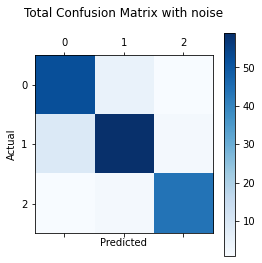

In [36]:
# create function for plotting the total confusion matrix for noisy data
total_confusion = cmt_total(XN,y,5,options[0],options[1],mySeed)
df_cm = pd.DataFrame(total_confusion) #change the the confusion matrix to data frame
def plot_confusion_matrix(df_cm, cmap=plt.cm.Blues): # create function for plotting the total confusion matrix
    plt.matshow(df_cm, cmap=cmap) #  # add color bar on the side
    plt.colorbar()
    plt.ylabel('Actual') # label y axis
    plt.xlabel('Predicted') # label x axis
    plt.grid(False) # stop showing the grid
    plt.title("Total Confusion Matrix with noise" '\n') # plot title
plot_confusion_matrix(df_cm)

<AxesSubplot:title={'center':'Seaborn Total Confusion Matrix with Noise'}, xlabel='Predicted', ylabel='Actual'>

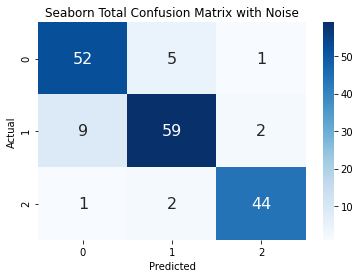

In [37]:
# plotting using seaborn 
total_confusion = cmt_total(XN,y,5,options[0],options[1],mySeed)
df_cm = pd.DataFrame(total_confusion) # change the the confusion matrix to data frame
ax = plt.axes()  # initilize it to set the title
ax.set_title('Seaborn Total Confusion Matrix with Noise') # add title
df_cm.index.name = 'Actual' # label y axis
df_cm.columns.name = 'Predicted' # label x axis
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, ax = ax) # plot the confusion matrix

## Total Confusion Matrix Precision, Recall and F1 score for Clean and Noisy Data 

In [38]:
# all of these functions predefined previously, only defined here in a different context (total confusion matrix)
def clean_precision(ytest, y_):
    classes = np.unique(y[testFold]) # number of unique classes
    perClass_precision = np.zeros(classes.shape) # initilize an empty array to store precision for each class
    
    C = cmt_total(X, y, 5, options[0], options[1], mySeed) # use the total confusion matrix
          
    for i in classes: # for each value in the class
        perClass_precision[i] = C[i,i] / sum(C[:, i]) #calculate precision
        
    return perClass_precision

def clean_recall(ytest, y_):
    classes = np.unique(y[testFold]) # number of unique classes
    perClass_recall = np.zeros(classes.shape) # initilize an empty array to store recall for each class
    
    C = cmt_total(X, y, 5, options[0], options[1], mySeed) # use the total confusion matrix
          
    for i in classes: # for every value in the class
         perClass_recall[i] = C[i,i] / sum(C[i,:]) # calculate recall
            
    return perClass_recall
            
def clean_f1score(ytest, y_):
    
    classes = np.unique(y_) # number of the unique classes
    f1score = np.zeros(classes.shape) # create an empty array to store the recall
    
    p = clean_precision(ytest, y_) # compute the precision 
    r = clean_recall(ytest, y_) # compute the recall
    
    for i in classes: # for each i in the classes dimension
        f1score[i] = 2 / (1 / p[i] + 1 / r[i]) # calculate f1score
    
    return f1score


def noisy_precision(ytest, y_):
    classes = np.unique(y[testFold]) # number of the unique classes
    perClass_precision_noise = np.zeros(classes.shape) # create an empty array to store the precision under noise
    
    CN = cmt_total(XN, y, 5, options[0], options[1],mySeed) # use the total confusion matrix
          
    for i in classes: # for each i in classes
        perClass_precision_noise[i] = CN[i,i] / sum(CN[:,i]) # calculate precision under noise
        
    return perClass_precision_noise


def noisy_recall(ytest, y_):
    classes = np.unique(y[testFold]) # number of the unique classes
    perClass_recall_noise = np.zeros(classes.shape) # create an empty array to store recall values
    
    CN = cmt_total(XN, y, 5, options[0], options[1],mySeed) # use the total confusion matrix
          
    for i in classes: # for each i in classes
         perClass_recall_noise[i] = CN[i,i] / sum(CN[i,:]) # calculate recall under noise
        
    return perClass_recall_noise


def f1score_noise(ytest, y_):
    
    classes = np.unique(y_) # number of the unique classes
    f1score = np.zeros(classes.shape) # create an empty array to store f1score values
    
    p = noisy_precision(ytest, y_) # compute the precision under noise 
    r = noisy_recall(ytest, y_) # compute the recall under noise
    
    for i in classes: # for each i in the classes dimension
        f1score[i] = 2 / (1 / p[i] + 1 / r[i]) # calculate f1score under noise
    
    return f1score

In [39]:
# test evaluation code
print('clean precision:', clean_precision(y[testFold],y_))
print('clean precision average: %.2f' %np.mean(clean_precision(y[testFold],y_)), '\n')

print('noisy precision:', noisy_precision(y[testFold],y_))
print('noisy precision average: %.2f' % np.mean(noisy_precision(y[testFold],y_)),'\n')

print('clean recall:', clean_recall(y[testFold], y_))
print('clean recall average: %.2f' %np.mean(clean_recall(y[testFold], y_)),'\n')

print('noisy recall:', noisy_recall(y[testFold],y_))
print('noisy recall average: %.2f' % np.mean(noisy_recall(y[testFold],y_)),'\n')

print('clean f1score:', clean_f1score(ytest,y_))
print('clean f1score average: %.2f' %np.mean(clean_f1score(ytest,y_)),'\n')

print('noisy f1score:', f1score_noise(ytest,y_))
print('noisy f1score average: %.2f' %np.mean(f1score_noise(ytest,y_)))

clean precision: [0.90163934 0.92537313 0.95744681]
clean precision average: 0.93 

noisy precision: [0.83870968 0.89393939 0.93617021]
noisy precision average: 0.89 

clean recall: [0.94827586 0.88571429 0.95744681]
clean recall average: 0.93 

noisy recall: [0.89655172 0.84285714 0.93617021]
noisy recall average: 0.89 

clean f1score: [0.92436975 0.90510949 0.95744681]
clean f1score average: 0.93 

noisy f1score: [0.86666667 0.86764706 0.93617021]
noisy f1score average: 0.89


### Summarizing the Results of the Precision, Recall and F1score

In [40]:
# summarizing the results for clean and noisy data for each of precision, recall and f1score in a data frame
Clean_precision = '%.2f'% np.mean(clean_precision(y[testFold],y_))
Noisy_precision = '%.2f'% np.mean(noisy_precision(y[testFold],y_))

Clean_recall = '%.2f'% np.mean(clean_recall(y[testFold], y_))
Noisy_recall = '%.2f'% np.mean(noisy_recall(y[testFold],y_))

Clean_f1score = '%.2f'% np.mean(clean_f1score(ytest,y_))
Clean_f1score = '%.2f'% np.mean(f1score_noise(ytest,y_))

pd.DataFrame([[Clean_precision, Noisy_precision], [Clean_recall, Noisy_recall], [Clean_f1score, Clean_f1score]], 
             ['Precision Average', 'Recall Average', 'F1score Average'],    
             columns=['Clean Data', 'Noisy Data']) # summarizing the values in data frame

,Clean Data,Noisy Data
Precision Average,0.93,0.89
Recall Average,0.93,0.89
F1score Average,0.89,0.89


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:
Yes, as it has happened in the wine dataset. when the data is noisy, the definition of all these parameters is expected to change since it is supposed to adapt to the training data. However, what I observed that when the noise is added, the number of neighbours to fit to the best parameter have increased. 

In general, I found it is difficult to tell if one parameter is a better choice as it depends on the dataset which is being used, but based on my data I found that euclidean is better based on the frequency in both clean and noisy data.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:
below are the main points to be considered in my opinion:

- Split between data and label: I will do some cleaning/manipulation if needed and divide the whole data into data/label, if not already done, before I start working with it
- Missing data treatment: I can use scikit learn library to handle the missing data before using it
- Scaling the data if needed: Scaling the data, when the dimension of the feautres vary, for e.g. some features have too small values while others are too big, therefore when using any distance measure, the outcome will not be accurate as well as outliers could appear
- Work with reasonable amount of data (not less/more): since working with a large dataset might be computaionally costly specially with knn, while in some scenarios more data could be needed

# References:
 
- https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python
- https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary?rq=1
- https://scikit-learn.org/stable/modules/cross_validation.html